In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# **1. 라이브러리/데이터 불러오기**

In [ ]:
# 데이터 불러오기 라이브러리
import pandas as pd
import numpy as np
import random as rnd

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train(4).csv') # 모델 학습 데이터
test = pd.read_csv('/content/drive/MyDrive/test(4).csv') # 모델 테스트 데이터
submission = pd.read_csv('/content/drive/MyDrive/submission(4).csv')

In [ ]:
train.shape

(8693, 14)



*   8693 개의 샘플
*   13 개의 독립변수, 1 개의 타깃변수






In [ ]:
test.shape

(4277, 13)




*   4277 개의 샘플
*   13 개의 독립변수






In [ ]:
submission.shape

(4277, 2)

In [ ]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# **Data Dictionary**

**PassengerID**: 탑승객 고유 아이디 (gggg: 승객 그룹 식별 번호, pp: 그룹 내 사람 식별 번호)

**HomePlanet**: 승객이 본래 거주하는 행성

**CryoSleep**: 항해 중 승객의 동면 여부

**Cabin**: 승객이 체류하는 객실 번호

**Destination**: 목적지

**Age**: 나이

**VIP**: 승객이 VIP 서비스를 받는지 여부

**RoomService**: 승객이 지불한 서비스 요금

**FoodCourt**: 승객이 지불한 서비스 요금

**ShoppingMall**: 승객이 지불한 서비스 요금

**Spa**: 승객이 지불한 서비스 요금

**VRDeck**: 승객이 지불한 서비스 요금

**Name**: 이름

**Transported**: 시공간 이상에 의한 이송 여부 (타깃 변수)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB




*   **수치형** 데이터 - Age, RoomService, FoodCourt, ShoppingMall, Sap, VRDect
*   **수치화** 필요 데이터 - PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name
*   타깃변수 **Transported** - bool 자료형





In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
# train 데이터 결측값 확인

train.isnull().sum() # 

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
# test 데이터 결측값 확인

test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# **2. 데이터 탐색적 분석 EDA**

In [ ]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# int, float 형 (숫자형) 데이터들 기술 통계량 확인
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000




*   Age mean = 28.8 세
*   RoomService 평균 요금 = 224.7
*   FoodCourt 평균 요금 = 458.1
*   ShoppingMall 평균 요금 = 173.7
*   Spa 평균 요금 = 311.1
*   VRDeck 평균 요금 = 304.9
*   모든 서비스 항목에서 25 %, 50 % 값 0 으로 나타남 -> 대부분의 승객 서비스 이용하지 않았음
*   **FoodCourt** > **Spa** > **VRDeck** > **RoomService** > **ShoppingMall** 순으로 **많은 비용 **지불한 경향을 보임








In [ ]:
train.describe(include=['object'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2




*   본래 **Earth 행성에 거주했던 승객**이 4602명으로 가장 많음
*   **동면하지 않은 승객**은 5439 명으로 동면한 승객보다 많음
*   **목적지가 TRAPPIST-1e 행성인 승객**이 5915 명으로 가장 많음
*   **VIP 서비스 이용하지 않은 승객**은 8291 명으로 대부분의 승객들이 VIP 서비스 이용하지 않았음





True     4378
False    4315
Name: Transported, dtype: int64

Text(0.5, 1.0, 'Transported')

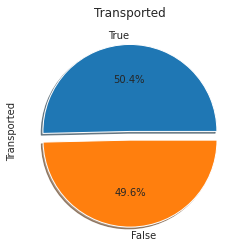

In [ ]:
# Transported true/false 비율

train['Transported'].value_counts()
ax = train['Transported'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=[0, 0.1]);
ax.set_title('Transported')
plt.show()



*   이송된 승객 50.4 % (4378 명), 이송에 실패한 승객 49.6 % (4315 명)
*   이송된 승객이 더 많으나, 비율 큰 차이 없음



In [ ]:
# 타깃변수 Transported (bool 자료형) 수치화 (True: 1, False 0)

train['Transported'] = train['Transported'].astype('int32')
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


False    5439
True     3037
Name: CryoSleep, dtype: int64

Text(0.5, 1.0, 'CryoSleep')

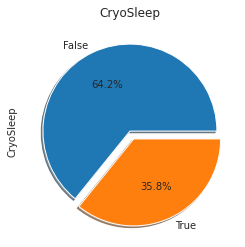

In [ ]:
# CryoSleep true/false 비율

train['CryoSleep'].value_counts()
ax = train['CryoSleep'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=[0, 0.1]);
ax.set_title('CryoSleep')
plt.show()



*   동면 진행한 승객 35.8 % (3037 명), 동면 진행하지 않은 승객 64.2 % (5439 명)
*   동면 진행하지 않은 승객이 약 1.8 배 더 많음



,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


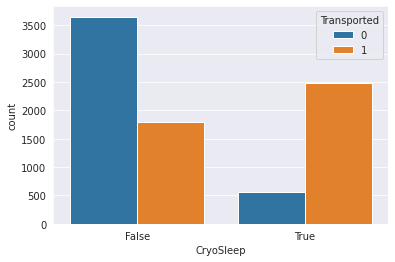

In [ ]:
# 동면 여부에 따른 이송율 파악

train[["CryoSleep", "Transported"]].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)
sns.countplot(x='CryoSleep',hue='Transported',data=train)



*   **동면 진행한 승객의 이송율 81.8%**
*   동면 진행하지 않은 승객의 이송율 32.9%
*   동면 진행한 승객의 이송율이 동면 진행하지 않은 승객의 이송율의 약 2.5 배






Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'HomePlanet')

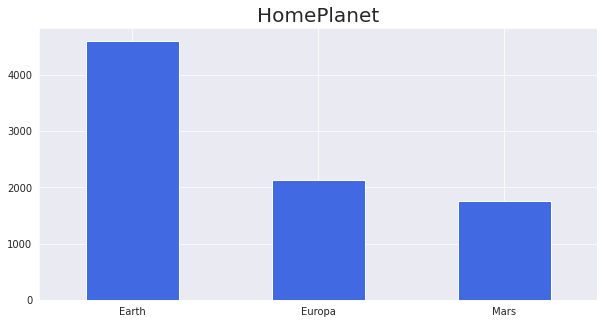

In [ ]:
# 출신 행성별 승객 수 파악

df = train['HomePlanet'].value_counts()
df
plt.figure(figsize=(15,8))
df.plot(kind='bar',stacked=True,color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('HomePlanet',size=20)
plt.show()



*   **Earth** > Europa > Mars 순으로 해당 행성 출신 승객 많음



,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


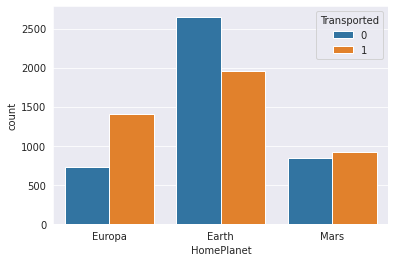

In [ ]:
# 출신 행성에 따른 이송율 파악

train[["HomePlanet", "Transported"]].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)
sns.countplot(x='HomePlanet',hue='Transported',data=train)



*   Europa 출신 승객 이송율 65.9 %
*   Mars 출신 승객 이송율 52.3 %
*   Earth 출신 승객 이송율 42.3 %
*   **Europa** > **Mars** > **Earth** 순으로 이송율 높음
*   Earth 출신 승객 수가 가장 많았으나 가장 낮은 이송율 보임
*   **Europa** **출신 승객**들의 높은 이송율, 절반 이상 도착 성공
*   Mars 출신 승객들의 이송율과 이송에 실패한 비율 큰 차이 없으나 이송율이 조금 더 높음







TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Destination')

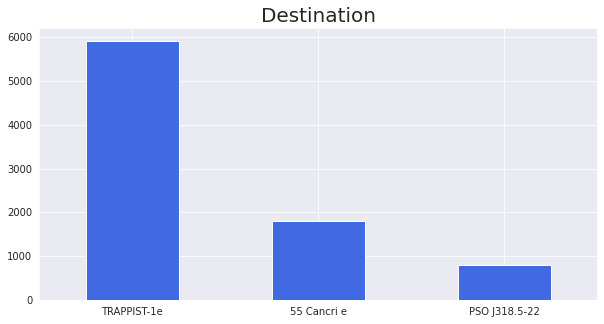

In [ ]:
# 목적지별 승객 수 파악

df = train['Destination'].value_counts()
df
plt.figure(figsize=(15,8))
df.plot(kind='bar',stacked=True,color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('Destination',size=20)
plt.show()



*   **TRAPPIST-1e** > 55 Cancri e > PSO J318.5-22 순으로 해당 행성을 목적지로 한 승객 많음



,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


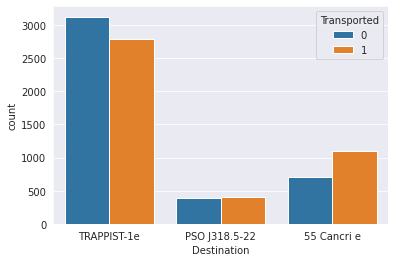

In [ ]:
# 목적지 별 이송율 파악

train[["Destination", "Transported"]].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)
sns.countplot(x='Destination',hue='Transported',data=train)

*   55 Cancri e 목적지 승객 이송율 61.0 %
*   PSO J318.5-22 목적지 승객 이송율 50.3 %
*   TRAPPIST-1e	 목적지 승객 이송율 47.1 %
*   **55 Cancri e** > **PSO J318.5-22** > **TRAPPIST-1e** 순으로 이송율 높음
*   TRAPPIST-1e 목적지 승객 수가 가장 많았으나 가장 낮은 이송율 보임
*   **55 Cancri e 목적지 승객**들의 높은 이송율, 절반 이상 도착 성공
*   PSO J318.5-22 목적지 승객들의 이송율과 이송에 실패한 비율 큰 차이 없으나 이송율이 조금 더 높음

False    8291
True      199
Name: VIP, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'VIP')

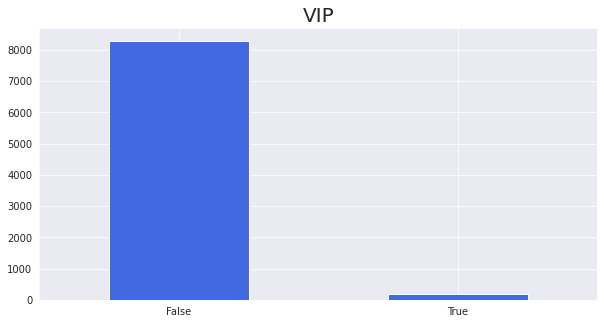

In [ ]:
# VIP 서비스 이용 비율 파악

df = train['VIP'].value_counts()
df
plt.figure(figsize=(15,8))
df.plot(kind='bar',stacked=True,color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('VIP',size=20)
plt.show()



*   VIP 서비스 이용하지 않은 승객이 VIP 서비스 이용한 승객에 비해 압도적으로 많음



,VIP,Transported
0,False,0.506332
1,True,0.381910


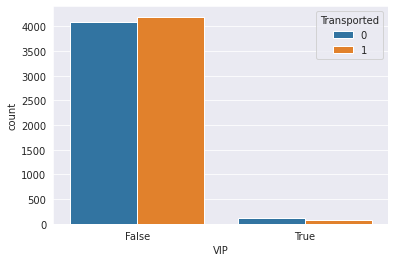

In [ ]:
# VIP 서비스 이용에 따른 이송율 파악

train[["VIP", "Transported"]].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)
sns.countplot(x='VIP',hue='Transported',data=train)



*   VIP 서비스 이용하지 않은 승객의 이송율 50.6 %
*   VIP 서비스 이용한 승객의 이송율 38.2 %
*   VIP 서비스 이용 유무가 이송율에 영향을 미쳤다기 보다는 해당 서비스를 이용한 승객이 VIP 서비스 이용하지 않은 승객이 VIP 서비스 이용한 승객에 비해 압도적으로 많기 떄문에 이송율이 높은 것이라 추측




Text(0.5, 1.0, 'Age')

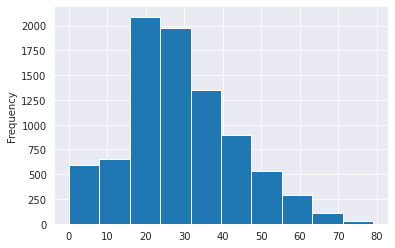

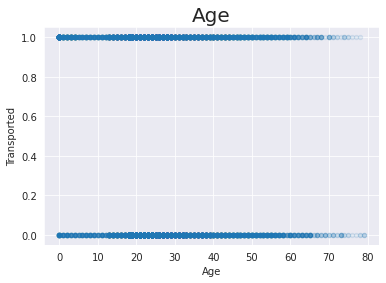

In [ ]:
# 승객 나이 분포 확인
train['Age'].plot(kind = 'hist', bins = 10, grid = True)
train.plot('Age','Transported', kind = 'scatter', alpha = 0.1)
plt.rcParams['figure.figsize']=6,3
plt.title('Age',size=20)




*   10대 후반~30대 초반까지의 승객 수가 가장 많음
*   scatter 차트에서 이송율은 연령대에 따라 큰 차이를 보이지는 않지만 높은 연령대일수록 이송율 낮아지는 경향을 보임 그러나 이는 높은 연령대의 승객수가 다른 연령대에 비해 적어서 그런 것이라고 추측할 수 있음







(array([ 34.,  18.,  22.,  16.,  18.,  13.,  17.,  20.,  20.,  18.,  14.,
         20.,  12.,  69.,  61.,  64.,  67.,  69., 160., 155., 151., 185.,
        158., 155., 184., 126., 140., 132., 117., 118., 101., 119., 112.,
         95.,  71.,  83.,  89., 103.,  90.,  76.,  55.,  62.,  66.,  63.,
         52.,  47.,  49.,  41.,  33.,  49.,  37.,  38.,  24.,  31.,  35.,
         36.,  26.,  24.,  23.,   8.,  19.,  14.,  13.,  16.,  13.,  16.,
          3.,   6.,   4.,   5.,   3.,   4.,   2.,   6.,   2.,   2.,   1.,
          1.,   2.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 

(array([144.,  49.,  53.,  59.,  53.,  20.,  23.,  32.,  26.,  24.,  25.,
         27.,  29.,  72.,  77.,  91.,  80.,  89., 160., 138., 126., 126.,
        133., 137., 140., 117., 128., 127., 150., 112.,  82.,  83.,  87.,
         83.,  77.,  88.,  89.,  74.,  71.,  62.,  73.,  67.,  53.,  65.,
         63.,  42.,  48.,  47.,  39.,  34.,  37.,  21.,  28.,  30.,  32.,
         32.,  22.,  22.,  24.,  27.,  15.,  18.,  13.,  10.,  16.,   7.,
          4.,   7.,   8.,   1.,   6.,   3.,   2.,   1.,   3.,   2.,   1.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 

([<matplotlib.axis.XTick at 0x7f89b82d9510>,
 <a list of 20 Text major ticklabel objects>)

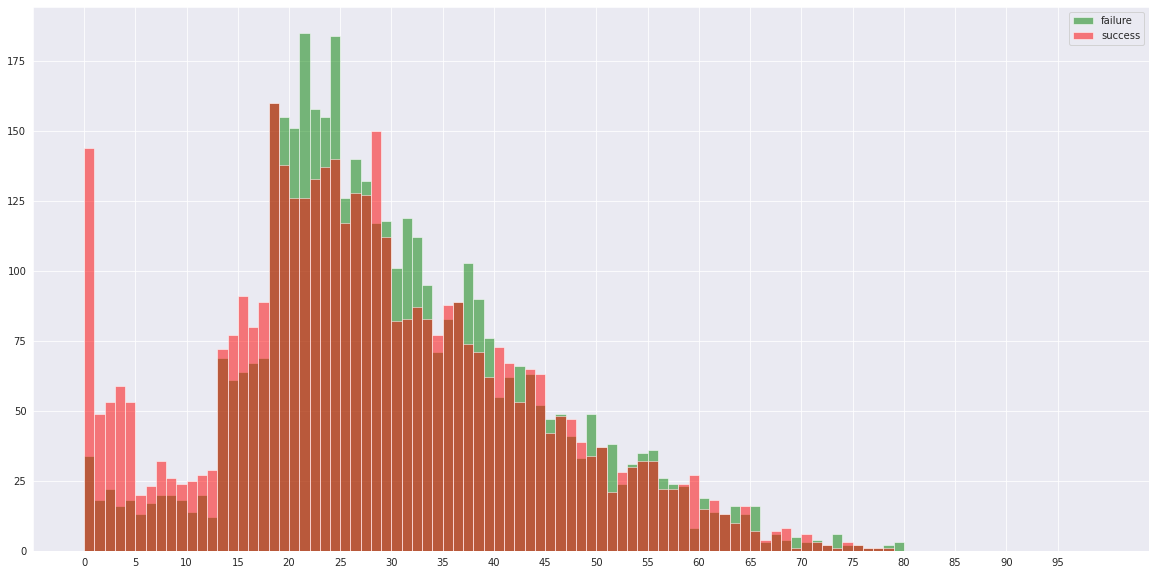

In [ ]:
# 히스토그램으로 연령별 이송율과 이송 실패율 분석

sns.set_style('darkgrid')
trans = train[train['Transported']==1]['Age'].tolist()
nontrans = train[train['Transported']==0]['Age'].tolist()
plt.hist(nontrans,bins=range(0,100),color='green',label='failure',alpha = 0.5) # 이송 x
plt.hist(trans,bins=range(0,100),color='red',label='success',alpha = 0.5) # 이송 o
plt.xticks(range(0,100,5))
plt.rcParams['figure.figsize']=20,10
plt.rcParams['axes.grid'] = True 
plt.legend()
plt.show() 



*   빨간색 - 이송 성공, 초록색 - 이송 실패
*   **0~10대 연령대**에서 빨간색이 지배적인 것으로 보아 **이송율 > 이송 실패율**
*   20대 연령대에서는 초록색의 범위가 빨간색 범위를 넘어선 것으로 보아 이송율 < 이송 실패율
*   나머지 연령대의 이송율과 이송 실패율 비슷









In [ ]:
# Cabin 변수 파악 - desk/num/side 로 구성

train.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64



*   desk/num/side로 나누어 피처 구성할 필요


0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'RoomService')

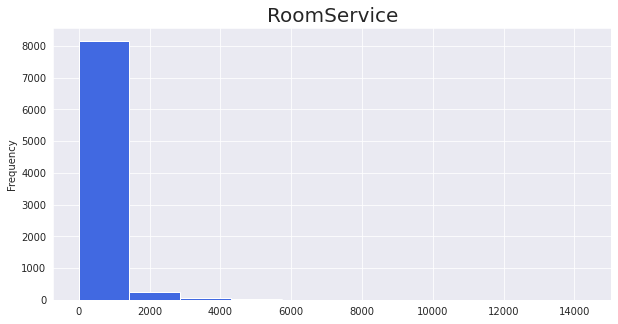

In [ ]:
# RoomService 이용 가격 분포 파악
train['RoomService'].value_counts()
df = train['RoomService']
plt.figure(figsize=(15,8))
df.plot(kind='hist',color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('RoomService',size=20)
plt.show()

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'FoodCourt')

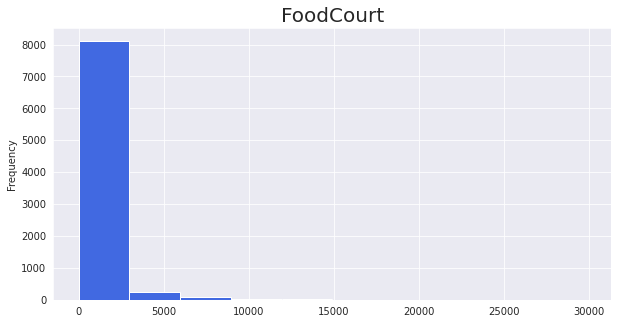

In [ ]:
# FoodCourt 이용 가격 분포 파악
train['FoodCourt'].value_counts()
df = train['FoodCourt']
plt.figure(figsize=(15,8))
df.plot(kind='hist',color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('FoodCourt',size=20)
plt.show()

0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'ShoppingMall')

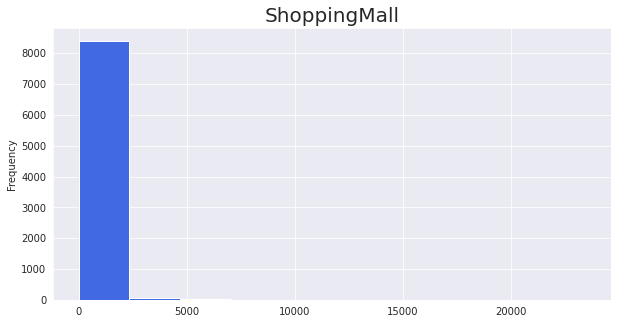

In [ ]:
# ShoppingMall 이용 가격 분포 파악
train['ShoppingMall'].value_counts()
df = train['ShoppingMall']
plt.figure(figsize=(15,8))
df.plot(kind='hist',color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('ShoppingMall',size=20)
plt.show()

0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Spa')

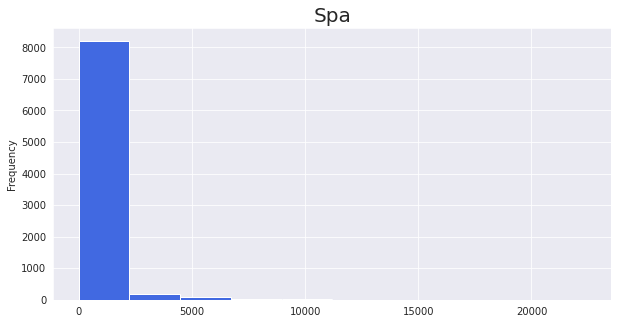

In [ ]:
# Spa 이용 가격 분포 파악
train['Spa'].value_counts()
df = train['Spa']
plt.figure(figsize=(15,8))
df.plot(kind='hist',color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('Spa',size=20)
plt.show()

0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: VRDeck, Length: 1306, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'VRDeck')

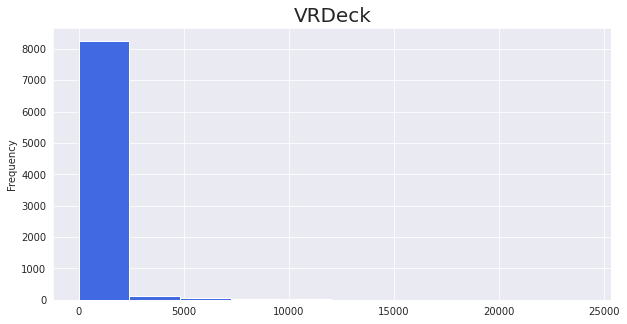

In [ ]:
# VRDeck 이용 가격 분포 파악
train['VRDeck'].value_counts()
df = train['VRDeck']
plt.figure(figsize=(15,8))
df.plot(kind='hist',color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('VRDeck',size=20)
plt.show()



*   지불한 서비스 금액 비연속형인 형태 (서비스 이용하거나 이용하지 않거나 (지불금액 0))
*   각 항목마다 이송율에 미치는 차이 없기 때문에 서비스 항목 하나로 합쳐서 차원 축소 가능



In [ ]:
# 시각화 위한 bar_chart 함수 선언

def bar_chart(feature):
  s = train[train['Transported']==1][feature].value_counts()
  d = train[train['Transported']==0][feature].value_counts()
  df = pd.DataFrame([s,d])
  df.index = ['True','False']
  df.plot(kind='bar',stacked=True,figsize=(10,5),rot=0,color='skyblue',grid=True)

# **3. Feature Engineering**



*   결측치 채우기
*   새로운 피처 생성
*   피처들 간의 상관관계 파악





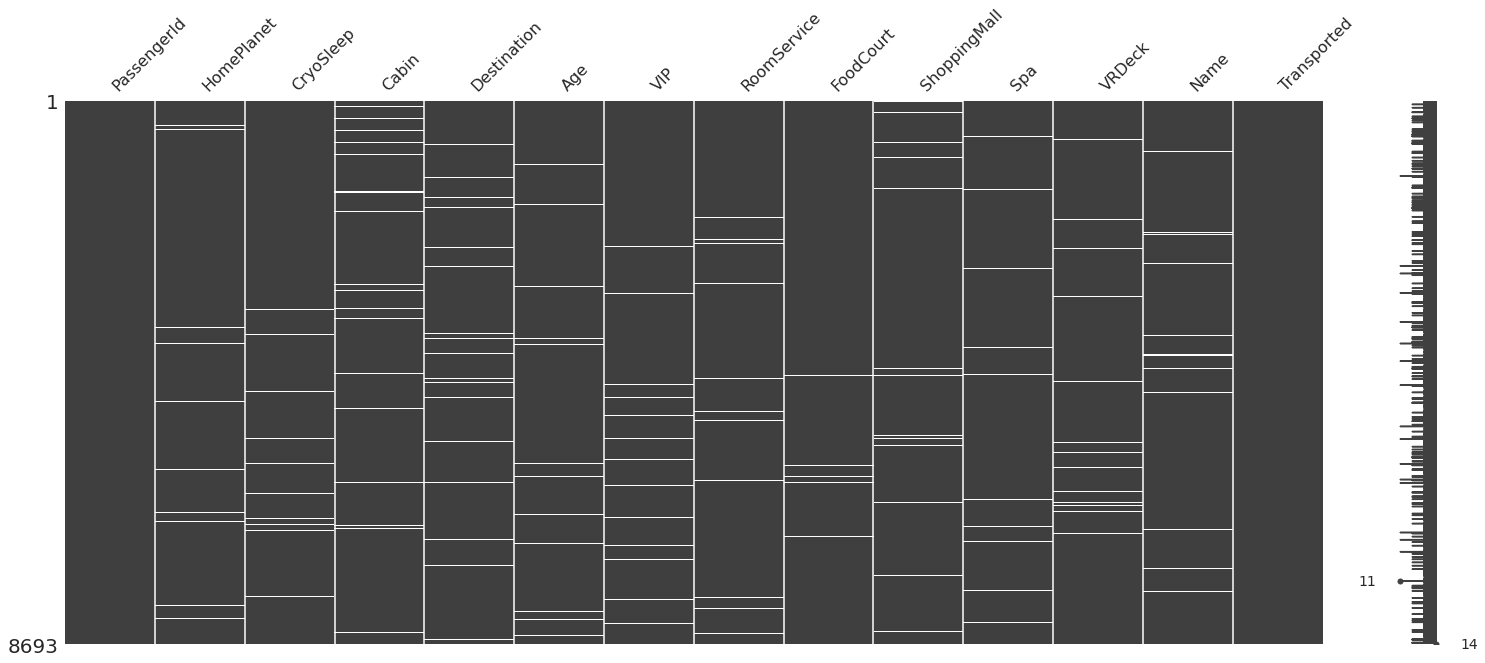

In [ ]:
msno.matrix(train)

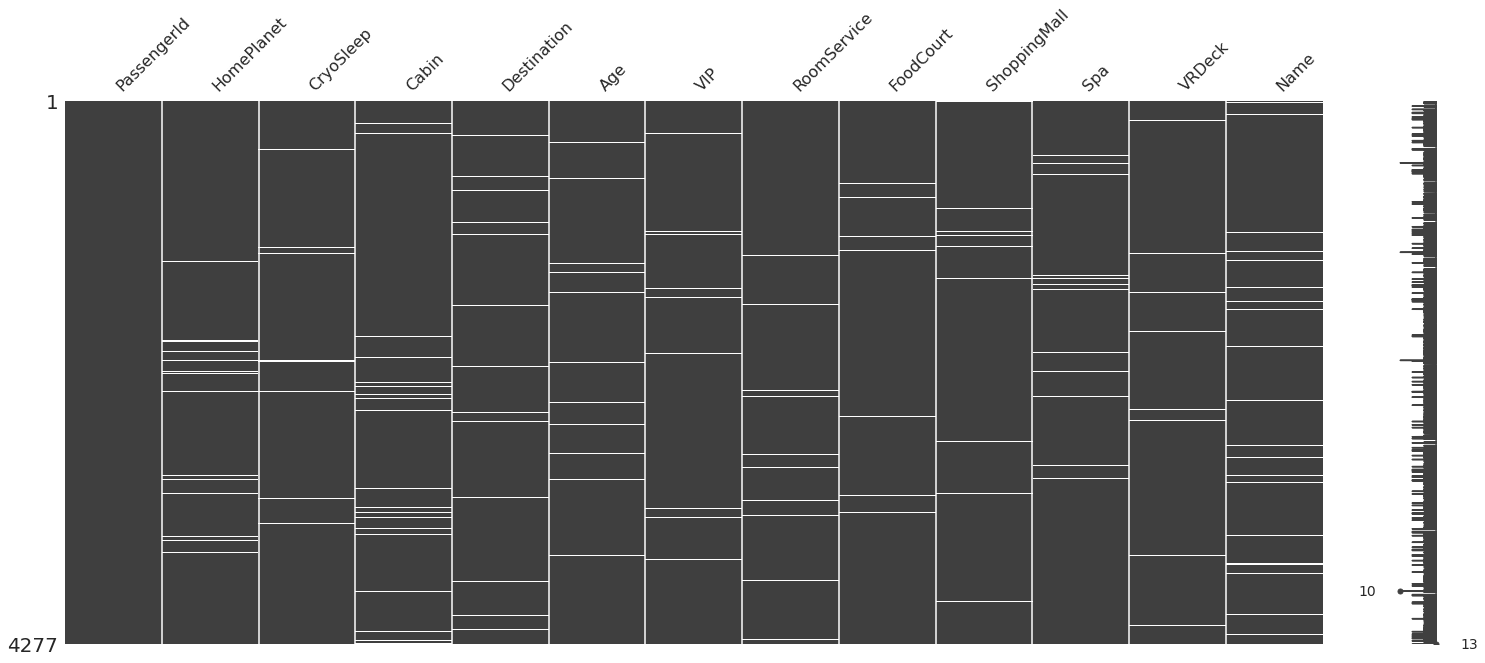

In [ ]:
msno.matrix(test)



*   PassengerID 제외하고 모든 변수에서 결측치 존재하지만 결측치 5% 미만



**3.0 Name**



*   가족 유무 판단 위해 Name 변수에서 성씨 추출 (비록 가족이 아닐 수는 있으나 동일 성씨인 가족일 가능성이 비교적 높기 때문에)
*   가족 유무 판단 데이터 생성해 낸 다음 Name 변수 drop



In [ ]:
train['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [ ]:
# Name 변수에서 성씨 뽑아내기

for t in [train]:
  t['Familyname'] = t['Name'].str.extract(' ([A-Za-z]+)') # Title 빼내는 정규표현식
for t in [test]:
  t['Familyname'] = t['Name'].str.extract(' ([A-Za-z]+)') # Title 빼내는 정규표현식

In [ ]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Familyname
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,Santantines
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,Hinetthews
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1,Jacostaffey
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1,Jacostaffey
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,1,Beston
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1,Flatic


In [ ]:
train['Familyname'].value_counts()
test['Familyname'].value_counts()

Casonston     18
Oneiles       16
Litthews      15
Domington     15
Fulloydez     14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: Familyname, Length: 2213, dtype: int64

Extraly       14
Hopperett     13
Tranklinay    11
Garrez        10
Dickley       10
              ..
Conpressen     1
Quelfly        1
Cluide         1
Irintious      1
Cure           1
Name: Familyname, Length: 1723, dtype: int64

In [ ]:
# 가족과 동승했으면 1 로 혼자 탔으면 0 으로 저장

for t in [train]:
  t['withfamily'] = np.where((train.groupby('Familyname').cumcount()+1)>=2,1,0)
for t in [test]:
  t['withfamily'] = np.where((test.groupby('Familyname').cumcount()+1)>=2,1,0)

,withfamily,Transported
1,1,0.506251
0,0,0.495935


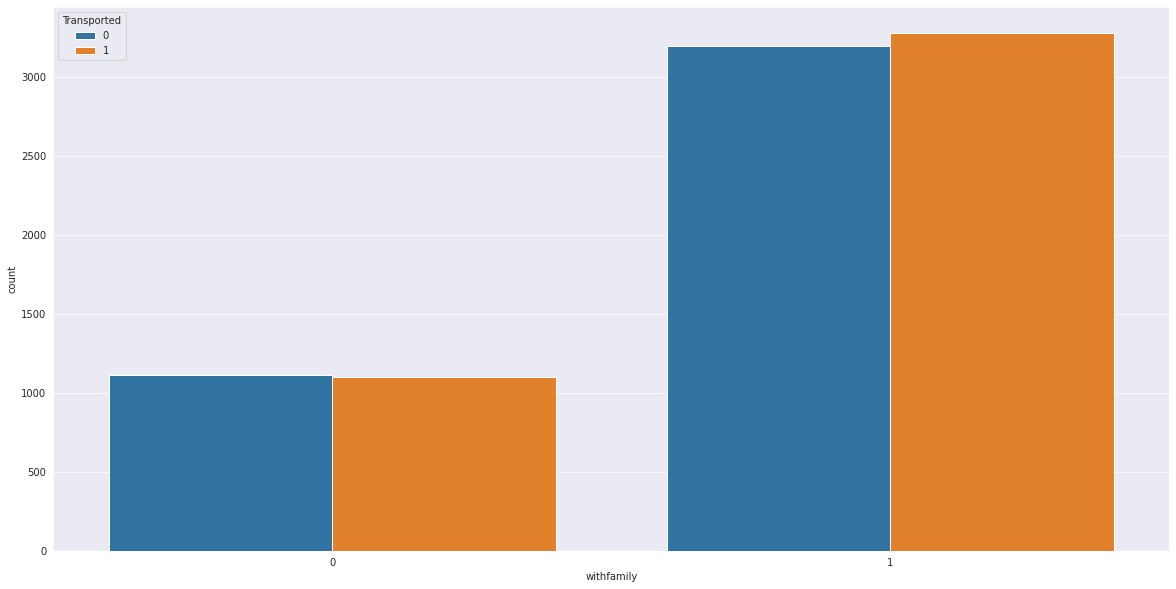

In [ ]:
# 가족 동승 유무별 이송율

train[["withfamily", "Transported"]].groupby(['withfamily'], as_index=False).mean().sort_values(by='Transported', ascending=False)
sns.countplot(x='withfamily',hue='Transported',data=train)



*   가족과 동승한 경우 가족과 동승하지 않은 경우보다 이송율이 높았으나 큰 차이는 없음



In [ ]:
# Name 변수 drop

train.drop(['Name'],inplace=True,axis=1)
test.drop(['Name'],inplace=True,axis=1)

In [ ]:
# Familyname 변수 drop

train.drop(['Familyname'],inplace=True,axis=1)
test.drop(['Familyname'],inplace=True,axis=1)

In [ ]:
test.head(5)
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,withfamily
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,withfamily
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0


**3.1 PassengerID**


*   그룹별 번호만 추출
*   번호별로 묶어 수치화




In [ ]:
# PassengerID 탑승객 고유 아이디 분석
# gggg_pp: gggg = 승객 그룹 식별 번호, pp = 그룹 내 사람 식별 번호
# 그룹 번호만 저장
train['PassengerId'] = train['PassengerId'].str[:4]
train['PassengerId'].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: PassengerId, Length: 6217, dtype: int64

In [ ]:
test['PassengerId'] = test['PassengerId'].str[:4]
test['PassengerId'].value_counts()

6332    8
6499    8
6986    8
8543    8
1072    8
       ..
3532    1
3538    1
3541    1
3545    1
9277    1
Name: PassengerId, Length: 3063, dtype: int64

In [ ]:
train['PassengerId'] = train['PassengerId'].astype('int')
test['PassengerId'] = test['PassengerId'].astype('int')

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'PassengerId')

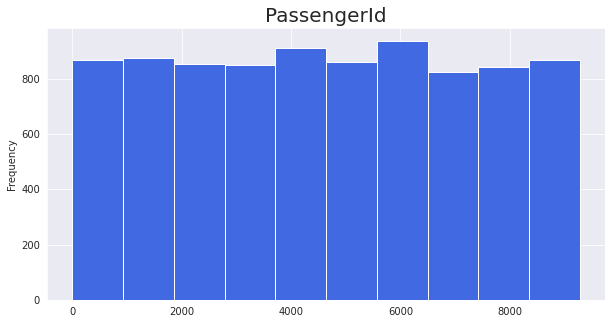

In [ ]:
df = train['PassengerId'].astype('int32')
plt.figure(figsize=(15,8))
df.plot(kind='hist',color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('PassengerId',size=20)
plt.show()



*   **6000번대 그룹에 속하는 승객수** 가장 많으나 번호별 범주마다 크게 차이를 보이지는 않음



In [ ]:
# 수치화
# Feature Scaling: 서로 다른 변수의 값 범위를 일정 수준으로 맞추는 작업
# 특성의 스케일은 알고리즘에 영향을 줌 (간격: 0.4 설정)

def get_c(c):
  c = int(c)
  num = 0
  if c<=1000: num = 0 
  elif c<=2000: num = 0.4
  elif c<=3000: num = 0.8
  elif c<=4000: num = 1.2
  elif c<=5000: num = 1.6
  elif c<=6000: num = 2.0
  elif c<=7000: num = 2.4
  elif c<=8000: num = 2.8
  else: num = 3.2
  return num

train['PassengerId']=train['PassengerId'].apply(lambda x : get_c(x)) # 범주화 숫자 저장
test['PassengerId']=test['PassengerId'].apply(lambda x : get_c(x)) # 범주화 숫자 저장
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,withfamily
0,0.0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0
2,0.0,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0
3,0.0,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0.0,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0


3.2    1215
2.4     995
1.6     963
2.0     955
1.2     946
0.0     938
0.4     937
0.8     906
2.8     838
Name: PassengerId, dtype: int64

,PassengerId,Transported
5,2.0,0.566492
6,2.4,0.558794
4,1.6,0.558671
3,1.2,0.512685
0,0.0,0.495736
7,2.8,0.486874
8,3.2,0.468313
1,0.4,0.452508
2,0.8,0.432671


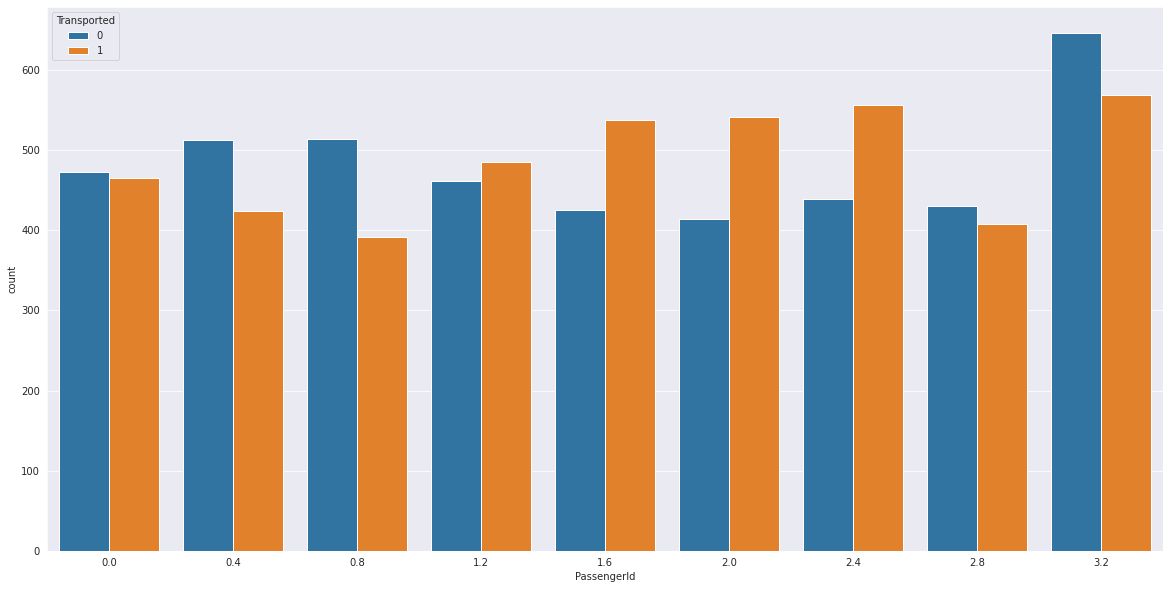

In [ ]:
train['PassengerId'].value_counts()
train[["PassengerId", "Transported"]].groupby(['PassengerId'], as_index=False).mean().sort_values(by='Transported', ascending=False)
sns.countplot(x='PassengerId', hue='Transported', data = train)



*   5000~7000번까지의 승객의 이송율 비교적 높음



**3.2 HomePlanet**

결측치 train 201개, test 87개 존재


*   결측치는 최빈값으로



Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


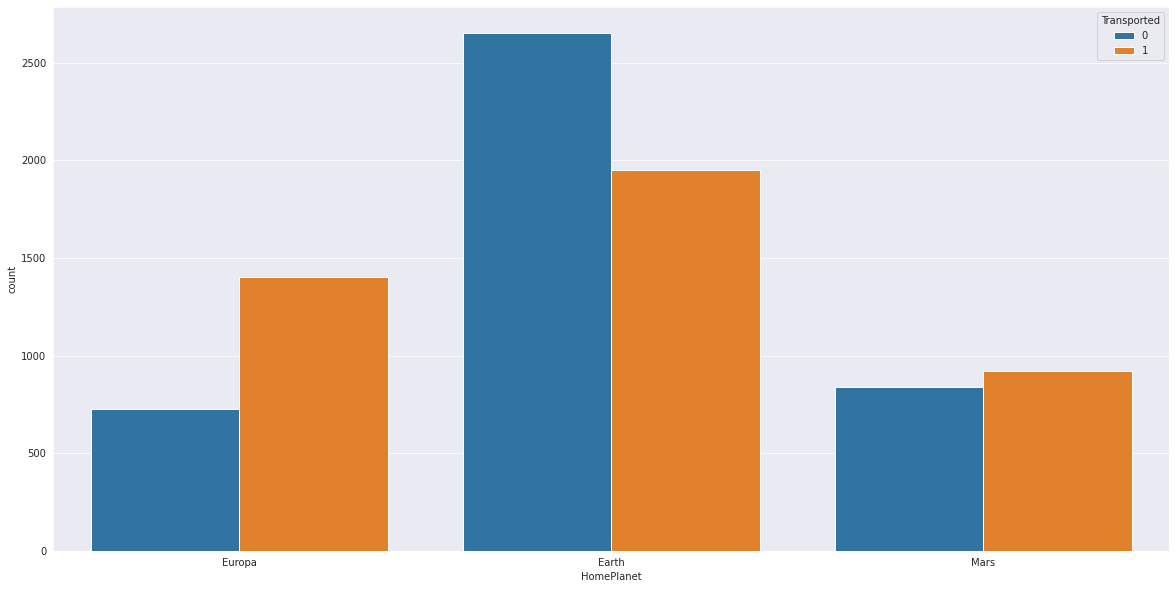

In [ ]:
# 도착지 빈도수 파악

train['HomePlanet'].value_counts()
train[["HomePlanet", "Transported"]].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)
sns.countplot(x='HomePlanet', hue='Transported', data = train)



*   EDA 과정에서 살펴본 것처럼 Europa 의 이송율이 가장 높음


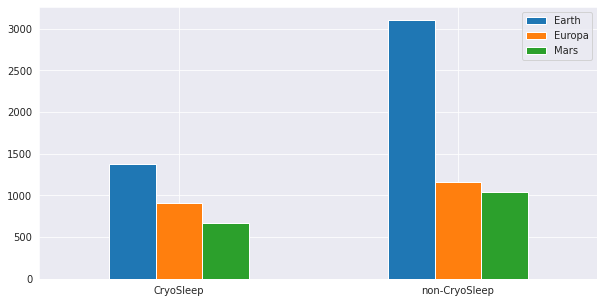

In [ ]:
# 동면 유무에 따른 도착지 파악

p1 = train[train['CryoSleep']==1]['HomePlanet'].value_counts()
p2 = train[train['CryoSleep']==0]['HomePlanet'].value_counts()
df = pd.DataFrame([p1,p2])
df.index = ['CryoSleep','non-CryoSleep']
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)




*   이송율 가장 높은 Europa 를 목적지로 한 승객들이 동면 진행율 역시 높을까 하여 분석을 진행해 보았지만 동면율과 동면하지 않은 승객 비율 비슷
*   동면한 승객 출신 행성 Earth 가 가장 많음
*   동면하지 않은 승객 출신 행성 Earth 가 가장 많음
*   Homeplanet 데이터의 **결측치 Earth 로 채워줘도 무관할 것이라 추측**





In [ ]:
# 결측치는 최빈값 Earth 로 채워줌

train['HomePlanet'].fillna('Earth', inplace=True)
test['HomePlanet'].fillna('Earth', inplace=True)

In [ ]:
# "Earth":0,"Europa":1,"Mars":2 수치화

train['HomePlanet'] = train['HomePlanet'].map({"Earth":0,"Europa":1,"Mars":2})
test['HomePlanet'] = test['HomePlanet'].map({"Earth":0,"Europa":1,"Mars":2})

**3.3 CryoSleep**

train 결측치 217개, test 결측치 93개


*   결측치는 CyroSleep = True 로
*   수치화 작업 필요
*   타깃변수에 높은 영향을 끼치는 변수





In [ ]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
train.isnull().sum() 

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
withfamily        0
dtype: int64

In [ ]:
# 동면 여부가 타깃 변수 예측에 가장 큰 영향을 미치는 피처일 것이라는 판단 하에 결측값 CryoSleep True 로 채워 줌
# 최빈값인 CryoSleep False 로 채워 준 경우보다 모델 정확도 더 높게 나타남

train['CryoSleep'] = train['CryoSleep'].fillna(1)
test['CryoSleep'] = test['CryoSleep'].fillna(1)

In [ ]:
# 수치화

train['CryoSleep'] = train['CryoSleep'].astype('int32')
test['CryoSleep'] = test['CryoSleep'].astype('int32')

1    2589
0    1789
Name: CryoSleep, dtype: int64

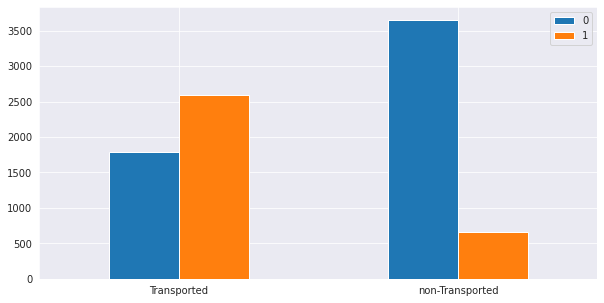

In [ ]:
# 이송 여부에 따른 동면 여부 파악
p1 = train[train['Transported']==1]['CryoSleep'].value_counts()
p1
p2 = train[train['Transported']==0]['CryoSleep'].value_counts()
df = pd.DataFrame([p1,p2])
df.index = ['Transported','non-Transported']
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)





*   이송 성공 승객: 동면 O > 동면 X
*   이송 실패 승객: 동면 O < 동면 X
*   **동면 진행했을 때 이송 성공 확률 높아짐**








**3.4 Cabin**

train 결측치 199개 test 결측치 100개

*   deck/num/side 형태
*   side 독립변수 추가 생성
*   num 독립변수 추가 생성 (숫자별 범주화 필요)
*   Cabin 에는 deck 알파벳만 저장
*   deck 알파벳에 따른 수치화
*   결측치는 최빈값으로 채우기





In [ ]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
# Cabin 독립변수에서 side P/S 알파벳만 저장

train['Side'] = train['Cabin'].str[-1] #  deck/num/side 형태로 구성, 맨 뒤 알파벳만 저장 
test['Side'] = test['Cabin'].str[-1] #  deck/num/side 형태로 구성, 맨 뒤 알파벳만 저장

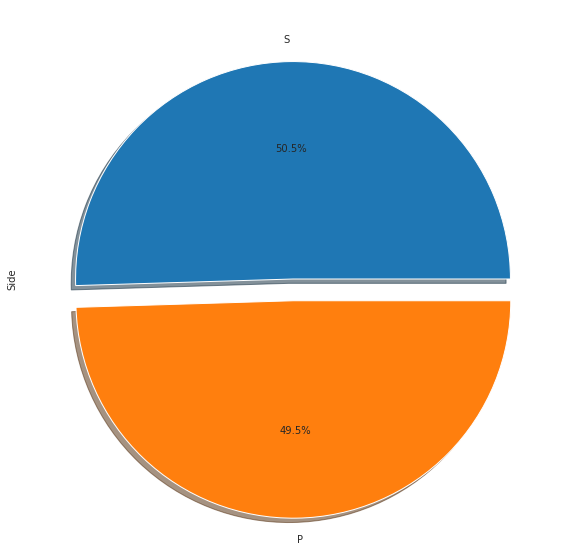

In [ ]:
# 전체 승객 중 S, P 구성 비율

ax = train['Side'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=[0, 0.1]);
plt.rcParams['figure.figsize']=6,6

,Side,Transported
1,S,0.555037
0,P,0.451260


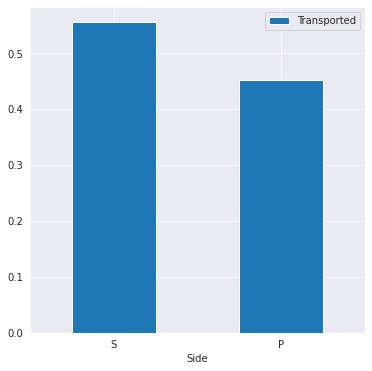

In [ ]:
# Cabin side S/P 에 따른 생존율 파악

train[["Side", "Transported"]].groupby(['Side'], as_index=False).mean().sort_values(by='Transported', ascending=False)
train[['Side', 'Transported']].groupby(['Side'], as_index=True).mean().sort_values(by='Transported', ascending=False).plot.bar(rot=0)
plt.rcParams['figure.figsize']=8,5

*   **Side가 S인 승객의 이송율 55.5%**
*   Side가 P인 승객의 이송율 45.1%
*   둘의 승객 수는 큰 차이를 보이지 않았으나, Side가 S인 승객의 이송율이 P인 승객에 비해 10% 가량 높음


In [ ]:
# 결측값은 최빈값으로 채워 줌

train['Side'] = train['Side'].fillna(train['Side'].mode()[0])
test['Side'] = test['Side'].fillna(test['Side'].mode()[0])

In [ ]:
# S side = 0 P side = 1 로 수치화

train['Side'] = train['Side'].map({"S":0,"P":1})
test['Side'] = test['Side'].map({"S":0,"P":1})

In [ ]:
# deck/num/side 에서 num 변수 추출

for t in [train]:
  t['Num'] = t['Cabin'].str.extract(r'(\d+)') # 숫자 빼내는 정규표현식
for t in [test]:
  t['Num'] = t['Cabin'].str.extract(r'(\d+)') # 숫자 빼내는 정규표현식

In [ ]:
# 결측값은 최빈값으로 채워 줌

train['Num'] = train['Num'].fillna(train['Num'].mode()[0])
test['Num'] = test['Num'].fillna(test['Num'].mode()[0])

In [ ]:
train['Num'].astype(int)
test['Num'].astype(int)

0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: Num, Length: 8693, dtype: int64

0          3
1          4
2          0
3          1
4          5
        ... 
4272    1496
4273       4
4274     296
4275     297
4276    1498
Name: Num, Length: 4277, dtype: int64

82      227
19       22
86       22
56       21
176      21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: Num, Length: 1817, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Num')

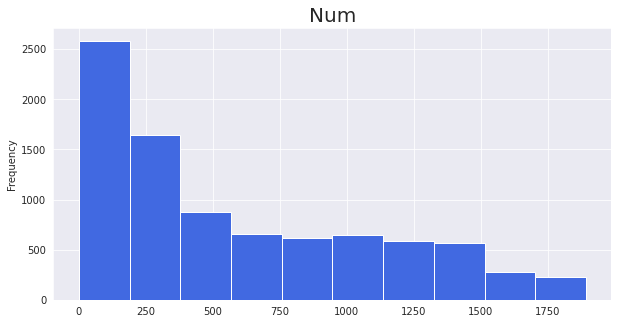

In [ ]:
# Num 범위 파악

train['Num'].value_counts()
df = train['Num'].astype(int)
plt.figure(figsize=(15,8))
df.plot(kind='hist',color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('Num',size=20)
plt.show()

In [ ]:
np.min(train['Num'].astype(int)), np.max(train['Num'].astype(int))

(0, 1894)

4       121
31       18
197      16
294      16
228      14
       ... 
1170      1
904       1
1174      1
356       1
1503      1
Name: Num, Length: 1505, dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Num')

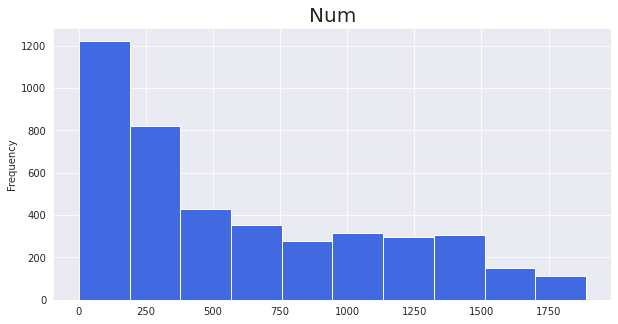

In [ ]:
test['Num'].value_counts()
df = test['Num'].astype(int)
plt.figure(figsize=(15,8))
df.plot(kind='hist',color='royalblue',figsize=(10,5),rot=0,grid=True)
plt.title('Num',size=20)
plt.show()



*   0 <= Num <= 1894 구성



In [ ]:
# 숫자 범주별 수치화

def get_c(c):
  num = 0
  if c<=250: num = 0 
  elif c<=400: num = 0.5
  elif c<=700: num = 1.0
  elif c<=1000: num = 1.5
  elif c<=1500: num = 2.0
  else: num = 2.5
  return num

train['Num']=train['Num'].astype(int).apply(lambda x : get_c(x)) # 범주화 숫자 저장
test['Num']=test['Num'].astype(int).apply(lambda x : get_c(x)) # 범주화 숫자 저장
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,withfamily,Side,Num
0,0.0,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0
1,0.0,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0,0,0.0
2,0.0,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0,0,0.0
3,0.0,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0.0
4,0.0,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0,0,0.0


In [ ]:
# Cabin 독립변수에서 deck 알파벳만 저장

train.Cabin.value_counts()
train['Cabin'] = train['Cabin'].str[:1] #  deck/num/side 형태로 구성, deck 만 저장
test['Cabin'] = test['Cabin'].str[:1] #  deck/num/side 형태로 구성, deck 만 저장

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin, dtype: int64

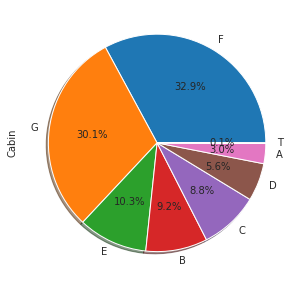

In [ ]:
train.Cabin.value_counts()
ax = train['Cabin'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True);
plt.rcParams['figure.figsize']=8,8



*   F > G > E > B > C > D > A > T 순서대로 승객 수 많음



,Cabin,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
0,A,0.496094
5,F,0.439871
3,D,0.433054
4,E,0.357306
7,T,0.200000


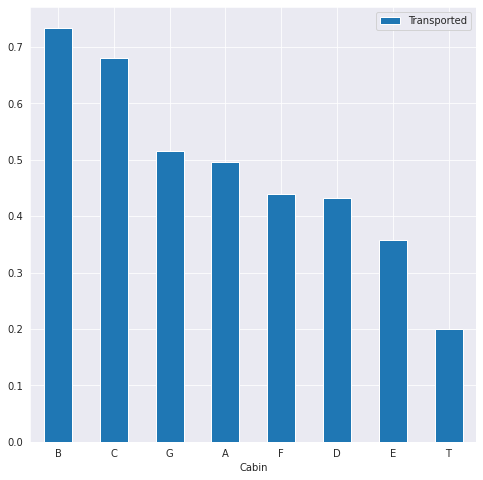

In [ ]:
train[["Cabin", "Transported"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Transported', ascending=False)
train[['Cabin', 'Transported']].groupby(['Cabin'], as_index=True).mean().sort_values(by='Transported', ascending=False).plot.bar(rot=0)
plt.rcParams['figure.figsize']=8,5

*   B > C > G > A > F > D > E > T 순서대로 이송율 높음
*   **B deck = 73.4 % 로 가장 높은 이송율**
*   C deck = 68.0 % 로 B 다음으로 높은 이송율
*   T deck 의 이송율 가장 낮은 이유는 승객 구성 비율이 0.1 % 밖에 되지 않아서 그런 것임

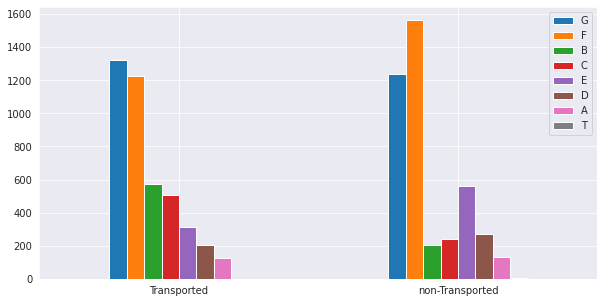

In [ ]:
# 이송 여부에 따른 Cabin 구성 비율

p1 = train[train['Transported']==1]['Cabin'].value_counts()
p2 = train[train['Transported']==0]['Cabin'].value_counts()
df = pd.DataFrame([p1,p2])
df.index = ['Transported','non-Transported']
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)



*   이송 성공: G > F > B > C > E > D > A > T
*   이송 실패: F > G > E > D > C > B > A > T
*   **B 갑판 (초록색) 에서의 높은 이송율**
*   T 승객은 너무 적어서 (총 5 명) 그래프 상에서 보이지 않음





In [ ]:
# 수치화
# Feature Scaling: 서로 다른 변수의 값 범위를 일정 수준으로 맞추는 작업
# 특성의 스케일은 알고리즘에 영향을 줌 (간격: 0.5 설정)

def get_c(c):
  num = 0
  if c=='A': num = 0 
  elif c=='B': num = 0.5
  elif c=='C': num = 1.0
  elif c=='D': num = 1.5
  elif c=='E': num = 2.0
  elif c=='F': num = 2.5
  elif c=='G': num = 3.0
  else: num = 3.5
  return num

train['Cabin']=train['Cabin'].apply(lambda x : get_c(x)) # 범주화 숫자 저장
test['Cabin']=test['Cabin'].apply(lambda x : get_c(x)) # 범주화 숫자 저장
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,withfamily,Side,Num
0,0.0,1,0,0.5,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0
1,0.0,0,0,2.5,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0,0,0.0
2,0.0,1,0,0.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0,0,0.0
3,0.0,1,0,0.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0.0
4,0.0,0,0,2.5,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0,0,0.0


In [ ]:
# 최빈값인 F 갑판으로 결측치 채워 줌

train['Cabin'].fillna(2.0, inplace=True)
test['Cabin'].fillna(2.0, inplace=True)

In [ ]:
train.head(5)
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,withfamily,Side,Num
0,0.0,1,0,0.5,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0
1,0.0,0,0,2.5,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0,0,0.0
2,0.0,1,0,0.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0,0,0.0
3,0.0,1,0,0.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0.0
4,0.0,0,0,2.5,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0,0,0.0


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,withfamily,Side,Num
0,0.0,0,1,3.0,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,0.0,0,0,2.5,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0,0,0.0
2,0.0,1,1,1.0,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3,0.0,1,0,1.0,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0,0,0.0
4,0.0,0,0,2.5,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0,0,0.0


**3.4 Destination**

train 결측치 182개 test 결측치 92개


*   결측치는 최빈값으로
*   수치화 작업 필요





TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Text(0.5, 1.0, 'Destination')

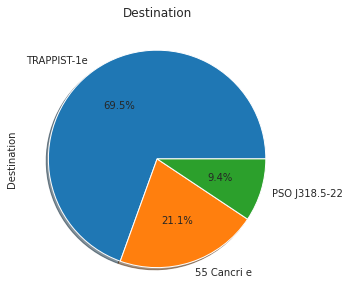

In [ ]:
# Destination 분포 파악

train['Destination'].value_counts()
ax = train['Destination'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True);
ax.set_title('Destination')
plt.show()

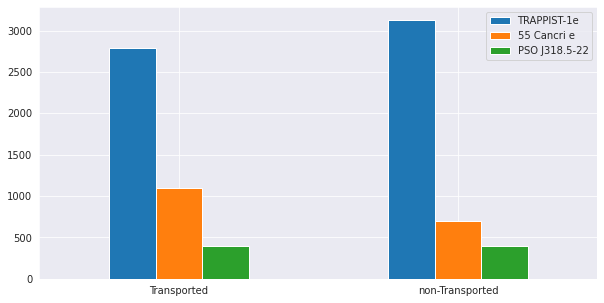

In [ ]:
# transported 에 따른 Destination 비율 파악

p1 = train[train['Transported']==1]['Destination'].value_counts()
p2 = train[train['Transported']==0]['Destination'].value_counts()
df = pd.DataFrame([p1,p2])
df.index = ['Transported','non-Transported']
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)



*   이송 성공, 이송 실패에서 모두 TRAPPIST-1e 를 목적지로 하는 승객수가 가장 많음
*   **결측치 TRAPPIST-1e 로 채워줘도 무방할 것이라 판단**



In [ ]:
# 결측치 최빈값인 TRAPPIST-1e 로 채워줌

train['Destination'].fillna('TRAPPIST-1e', inplace=True)
test['Destination'].fillna('TRAPPIST-1e', inplace=True)

In [ ]:
# 수치화 "TRAPPIST-1e":0 "55 Cancri e":1 "PSO J318.5-22":2

train['Destination'] = train['Destination'].map({"TRAPPIST-1e":0, "55 Cancri e":1, "PSO J318.5-22":2})
test['Destination'] = test['Destination'].map({"TRAPPIST-1e":0, "55 Cancri e":1, "PSO J318.5-22":2})

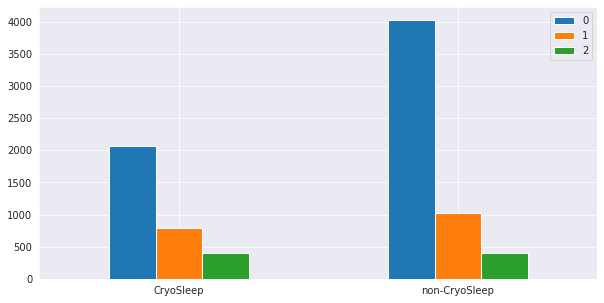

In [ ]:
# 동면 여부에 따른 도착지 파악

p1 = train[train['CryoSleep']==1]['Destination'].value_counts()
p2 = train[train['CryoSleep']==0]['Destination'].value_counts()
df = pd.DataFrame([p1,p2])
df.index = ['CryoSleep','non-CryoSleep']
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)

In [ ]:
train[["Destination", "CryoSleep"]].groupby(['Destination'], as_index=False).mean().sort_values(by='CryoSleep', ascending=False)

,Destination,CryoSleep
2,2,0.505025
1,1,0.435000
0,0,0.339347


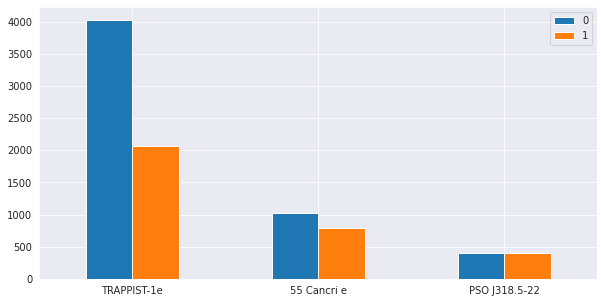

In [ ]:
# 도착치에 따른 동면 여부

p1 = train[train['Destination']==0]['CryoSleep'].value_counts()
p2 = train[train['Destination']==1]['CryoSleep'].value_counts()
p3 = train[train['Destination']==2]['CryoSleep'].value_counts()
df = pd.DataFrame([p1,p2,p3])
df.index = ["TRAPPIST-1e", "55 Cancri e","PSO J318.5-22"]
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)



*   목적지 TRAPPIST-1e 승객: 동면 X > 동면 O
*   목적지 55 Cancri e 승객: 동면 X > 동면 O
*   목적지 PSO J318.5-22 승객: 동면 X > 동면 O





**3.5 Age**

train 결측치 179 test 결측치 91


*   결측치는 평균나이로
*   나이 범주별로 묶어서 수치화



In [ ]:
# 평균 나이로 결측치 채워 줌

np.mean(train['Age']) # 28.82살

train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(train['Age'].mean(), inplace=True)

28.82793046746535

In [ ]:
# young, young-adult, adult, old-adult, senior 그룹으로 묶어 수치화

def get_c(c):
  num = 0
  if c<=15: num = 0 # young
  elif c<=28: num = 1 # young-adult
  elif c<=40: num = 2 # adult
  elif c<=55: num = 3 # old-adult
  else: num = 4 # senior
  return num

train['Age']=train['Age'].apply(lambda x : get_c(x)) # 범주화 숫자 저장
test['Age']=test['Age'].apply(lambda x : get_c(x)) # 범주화 숫자 저장
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,withfamily,Side,Num
0,0.0,1,0,0.5,0,2,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0
1,0.0,0,0,2.5,0,1,False,109.0,9.0,25.0,549.0,44.0,1,0,0,0.0
2,0.0,1,0,0.0,0,4,True,43.0,3576.0,0.0,6715.0,49.0,0,0,0,0.0
3,0.0,1,0,0.0,0,2,False,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0.0
4,0.0,0,0,2.5,0,1,False,303.0,70.0,151.0,565.0,2.0,1,0,0,0.0


,Age,Transported
0,0,0.648387
4,4,0.497674
3,3,0.490392
1,1,0.478551
2,2,0.471391


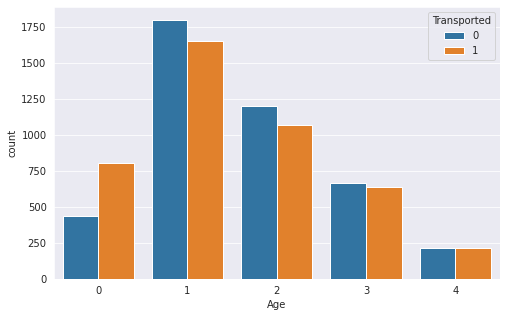

In [ ]:
train[['Age', "Transported"]].groupby(['Age'], as_index=False).mean().sort_values(by='Transported', ascending=False)
sns.countplot(x='Age', hue='Transported', data = train)



*   young > adult > old-adult > young-adult > senior 순으로 이송율 높음


*   young 그룹 유일하게 이송율이 이송 실패율보다 더 높음





**3.8 RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**



*   결측치는 평균값으로
*   서비스 이용하지 않은 사람은 모두 이용하지 않고, 이용한 사람은 비교적 높은 값 지불한 경향 -> 서비스 이용유무로 이진분류 가능할 것이라 추측
*   **Service 항목 변수 뽑아 냄**



In [ ]:
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].mean())
test['RoomService'] = test['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].mean())
test['FoodCourt'] = test['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
test['ShoppingMall'] = test['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa'] = train['Spa'].fillna(train['Spa'].mean())
test['Spa'] = test['Spa'].fillna(train['Spa'].mean())
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].mean())
test['VRDeck'] = test['VRDeck'].fillna(train['VRDeck'].mean())

In [ ]:
test['Service'] = np.where(test['RoomService']+test['FoodCourt']+
                            test['ShoppingMall']+test['Spa']+
                            test['VRDeck']!=0,1,0)

In [ ]:
train['Service'] = np.where(train['RoomService']+train['FoodCourt']+
                            train['ShoppingMall']+train['Spa']+
                            train['VRDeck']!=0,1,0)
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,withfamily,Side,Num,Service
0,0.0,1,0,0.5,0,2,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0
1,0.0,0,0,2.5,0,1,False,109.0,9.0,25.0,549.0,44.0,1,0,0,0.0,1
2,0.0,1,0,0.0,0,4,True,43.0,3576.0,0.0,6715.0,49.0,0,0,0,0.0,1
3,0.0,1,0,0.0,0,2,False,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0.0,1
4,0.0,0,0,2.5,0,1,False,303.0,70.0,151.0,565.0,2.0,1,0,0,0.0,1


In [ ]:
train[['Service','Transported']].groupby(['Service'],as_index=False).mean()

,Service,Transported
0,0,0.783800
1,1,0.336577




*   서비스 사용하지 않은 승객 이송율 78.3 %
*   서비스 사용한 승객 이송율 33.6 %
*   서비스 사용하지 않은 승객 이송율 > 서비스 사용한 승객 이송율







,Service,CryoSleep
0,0,0.855251
1,1,0.087587


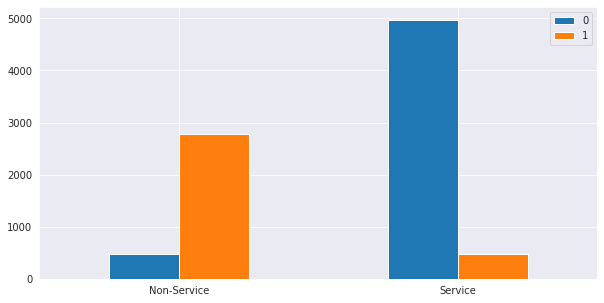

In [ ]:
train[["Service", "CryoSleep"]].groupby(['Service'], as_index=False).mean().sort_values(by='CryoSleep', ascending=False)
p1 = train[train['Service']==0]['CryoSleep'].value_counts()
p2 = train[train['Service']==1]['CryoSleep'].value_counts()
df = pd.DataFrame([p1,p2])
df.index = ['Non-Service','Service']
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)



*   서비스 이용하지 않은 승객의 82.8% 가 동면
*   서비스 이용한 승객의 6.3% 가 동면 -> 불가능한 사례?










**3.7 VIP**

train 결측치 203 test 결측치 93


*   결측치는 최빈값으로
*   수치화 작업 필요
*   부와 연관지어 데이터 항목 만들어낼 수 있을까?






In [ ]:
# 결측치는 최빈값인 False로 채워 줌
train['VIP'] = train['VIP'].fillna(train['VIP'].mode()[0])
test['VIP'] = test['VIP'].fillna(train['VIP'].mode()[0])

In [ ]:
# 수치화 (True: 1, False 0)
train["VIP"] = train["VIP"].astype(int)
test["VIP"] = test["VIP"].astype(int)

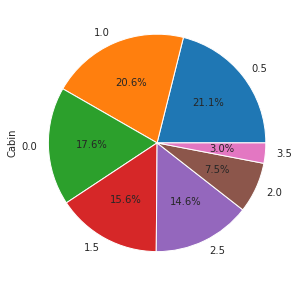

In [ ]:
# VIP 사용여부에 따른 객실 위치 파악

vip = train[train['VIP']==1]['Cabin'].value_counts()
vip.plot(kind='pie',autopct='%1.1f%%')
plt.show()



*   객실 위치가 혹시 부와 연관이 있을까 해서 VIP 사용여부에 따른 객실 위치를 파악해 보았으나, VIP 서비스 이용 승객이 골고루 분포되어 있는 것으로 보아 **객실 위치**와 **부의 정도**는 크게 관련없는 것으로 보임



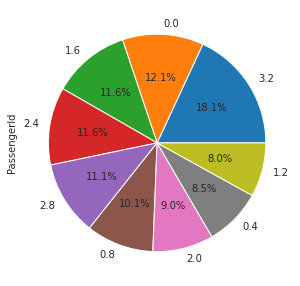

In [ ]:
vip = train[train['VIP']==1]['PassengerId'].value_counts()
vip.plot(kind='pie',autopct='%1.1f%%')
plt.show()

*   객실 위치가 혹시 그룹별 ID와 연관이 있을까 해서 VIP 사용여부에 따른 그룹별 ID를 파악해 보았으나, VIP 서비스 이용 승객이 골고루 분포되어 있는 것으로 보아 **그룹별 ID**와 **부의 정도**는 크게 관련 없는 것으로 보임

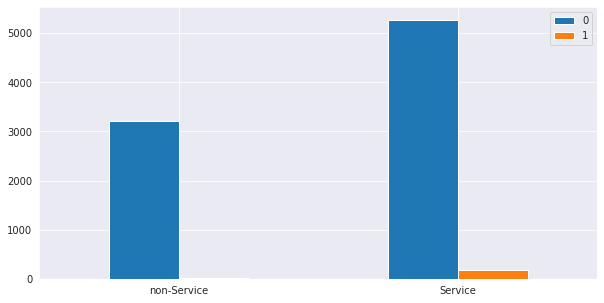

In [ ]:
p1 = train[train['Service']==0]['VIP'].value_counts()
p2 = train[train['Service']==1]['VIP'].value_counts()
df = pd.DataFrame([p1,p2])
df.index = ["non-Service","Service"]
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)



*   Service 이용하지 않은 승객은 VIP 서비스 역시 이용하지 않는 경향





In [ ]:
# VIP 이용 유무에 따른 이송율 파악

train[["VIP", "Transported"]].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,0,0.506475
1,1,0.381910




*   VIP 이용했다고 해서 이송율이 높은 것도 아님 오히려 이송 실패율이 더 높음
*   VIP 서비스 이용 유무는 이송율에 크게 영향력을 끼치는 변수가 아닌 것으로 추측





## **Summary**


*  **동면 진행** 승객 이송율 81.8
*  **Europa** 출신 승객 이송율 65.9%
*  **55 Cancri e** 목적지 승객 이송율 65.9 %
*  **0~10대 연령대** 이송율 > 이송 실패율
*  **B deck** 이송율 73.4 %

# **3.8 히트맵 확인**

<Figure size 720x432 with 0 Axes>

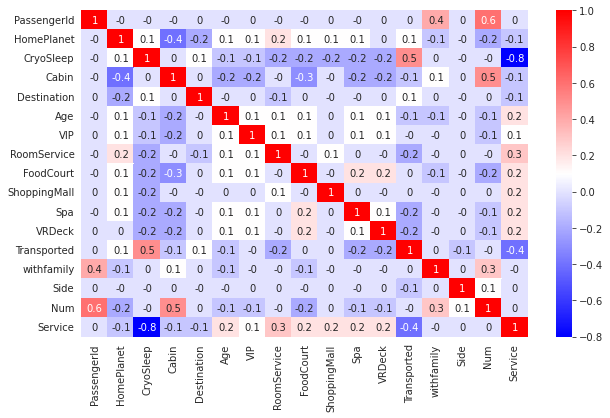

In [ ]:
correlation_matrix = train.corr().round(1)
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.show()



*  추측한대로 **동면 여부** 외에는 크게 주목할 만한 타깃변수와의 상관관계 보이지 않음
*  withFamily 변수와 PassengerId/Num 변수와 일정 상관관계를 보이는 것으로 보아 가족은 번호가 가까운 그룹/번호로 묶여있다는 것 알 수 있음






# **4. Modeling & Validation**

In [ ]:
# 모델 개발 라이브러리

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [ ]:
train.shape
test.shape

(8693, 17)

(4277, 16)

In [ ]:
train.isnull().sum()
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
withfamily      0
Side            0
Num             0
Service         0
dtype: int64

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
withfamily      0
Side            0
Num             0
Service         0
dtype: int64

In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   float64
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int32  
 3   Cabin         8693 non-null   float64
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   int64  
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Transported   8693 non-null   int32  
 13  withfamily    8693 non-null   int64  
 14  Side          8693 non-null   int64  
 15  Num           8693 non-null   float64
 16  Service       8693 non-null   int64  
dtypes: float64(8), int32(2), int64(7)
memory usage: 1.1 MB
<class 'pandas.c

In [ ]:
train_data = train
train_data = train_data.drop('Transported',axis=1) # 타깃 변수 drop
train_data # 훈련 데이터 생성 완료
train_target = train['Transported']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,withfamily,Side,Num,Service
0,0.0,1,0,0.5,0,2,0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0
1,0.0,0,0,2.5,0,1,0,109.0,9.0,25.0,549.0,44.0,0,0,0.0,1
2,0.0,1,0,0.0,0,4,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0.0,1
3,0.0,1,0,0.0,0,2,0,0.0,1283.0,371.0,3329.0,193.0,1,0,0.0,1
4,0.0,0,0,2.5,0,1,0,303.0,70.0,151.0,565.0,2.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,3.2,1,0,0.0,1,3,1,0.0,6819.0,0.0,1643.0,74.0,1,1,0.0,1
8689,3.2,0,1,3.0,2,1,0,0.0,0.0,0.0,0.0,0.0,1,0,2.0,0
8690,3.2,0,0,3.0,0,1,0,0.0,0.0,1872.0,1.0,0.0,1,0,2.0,1
8691,3.2,1,0,2.0,1,2,0,0.0,1049.0,0.0,353.0,3235.0,1,0,1.0,1


# **K fold cross validation**
 K 개의 검증 세트로 K 번 성능 평가한 후 계산된 선능 

*   K 개의 검증 세트로 K 번 성능 평가한 후 계산된 선능 평균을 내어 최종 성능 개선
*   **10** 개의 fold 로 나눔

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10,shuffle=True,random_state=0) # Kfold 검증 활용

### **3.1 KNN (이웃 알고리즘)**


*   K개의 가장 가까운 훈련 데이터 참조하여 분류

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knnscore = cross_val_score(knn, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
knnscore

array([0.79425287, 0.78390805, 0.81494253, 0.79976985, 0.76524741,
       0.77675489, 0.81242808, 0.79056387, 0.79056387, 0.78711162])

In [ ]:
knnaccuracy = round(np.mean(knnscore)*100,2)
knnaccuracy

79.16

### **3.2 Decision Tree (의사 결정 나무)**

*   타깃변수 맞추기 위해 나무 쪼개나가는 알고리즘
*   나무 = train 데이터의 특성들
*   구별하기 가장 좋은 질문부터 (여자인가 남자인가? 동승자가 있는가 없는가?)

In [ ]:
dtree = DecisionTreeClassifier()
dtreescore = cross_val_score(dtree, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
dtreescore

array([0.72758621, 0.73678161, 0.74482759, 0.75258918, 0.70655926,
       0.7410817 , 0.75028769, 0.73532796, 0.74453395, 0.72266974])

In [ ]:
dtreeaccuracy = round(np.mean(dtreescore)*100,2)
dtreeaccuracy

73.62

### **3.3 Random Forest (여러 개의 Decision Tree 사용)**


*   decision tree 과적합 되었을 경우 솔루션으로 사용
*   질문이 랜덤으로 주어짐


In [ ]:
rforest = RandomForestClassifier(n_estimators=15)
rforestscore = cross_val_score(rforest, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
rforestscore

array([0.79885057, 0.78045977, 0.8045977 , 0.8009206 , 0.76524741,
       0.79056387, 0.79401611, 0.81242808, 0.78596087, 0.78250863])

In [ ]:
rforestaccuracy = round(np.mean(rforestscore)*100,2)
rforestaccuracy

79.16

### **3.4 LogisticRegression**



*   선형 데이터 분류 문제 해결 모델
*   0~1 사이의 확률값 반환


In [ ]:
lrmodel = LogisticRegression()
lrmodel.fit(train_data, train_target)
lrscore = cross_val_score(lrmodel, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
lrscore

LogisticRegression()

array([0.75747126, 0.77931034, 0.7816092 , 0.78596087, 0.77100115,
       0.78365938, 0.79056387, 0.79401611, 0.78365938, 0.79401611])

In [ ]:
lraccuracy = round(np.mean(lrscore)*100,2)
lraccuracy

78.21

In [ ]:
# 이송 여부에 미치는 변수별 영향력 파악

df = pd.DataFrame(train_data.columns)
df.columns = ['Feature']
df["Correlation"] = pd.Series(lrmodel.coef_[0])
df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,CryoSleep,1.097476
1,HomePlanet,0.486297
4,Destination,0.257898
12,withfamily,0.178121
0,PassengerId,0.121874
5,Age,0.018939
8,FoodCourt,0.000654
9,ShoppingMall,0.000526
11,VRDeck,-0.001443
7,RoomService,-0.001552




*   **CryoSleep** 이 이송 여부에 가장 영향력이 큰 변수
*   CryoSleep > HomePlanet > Destination > withfamily > PassengerId 순으로 영향력 큼




### **3.5 SVM (Support Vector Machine)**



*   비선형 데이터 분류 문제 해결 모델

*   분류시 decision boundary 와 가까이 있는 서포트 벡터만 고려하여 계산양 줄일 수 있음

In [ ]:
svm = SVC()
svmscore = cross_val_score(svm, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
svmscore

array([0.77241379, 0.78275862, 0.78735632, 0.80782509, 0.75258918,
       0.78250863, 0.79631761, 0.81012658, 0.78135788, 0.79286536])

In [ ]:
svmaccuracy = round(np.mean(svmscore)*100,2)
svmaccuracy

78.66

### **3.6 LGBMClassifier**


*   틀린 부분에 가중치 더하며 학습하는 알고리즘
*   큰 사이즈 데이터에 용이



In [ ]:
lgbm = LGBMClassifier(random_state=42)
lgbmscore = cross_val_score(lgbm, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
lgbmscore

array([0.82068966, 0.79655172, 0.8045977 , 0.80437284, 0.79056387,
       0.82623705, 0.82278481, 0.82853855, 0.80667434, 0.81127733])

In [ ]:
lgbmaccuracy = round(np.mean(lgbmscore)*100,2)
lgbmaccuracy

81.12

### **3.7 Stochastic Gradient Descent**


*   기울기의 반대 방향으로 이동 반복하는 알고리즘
*  **미니배치** 활용하여 계산 시간 빠름




In [ ]:
sgd = SGDClassifier()
sgdscore = cross_val_score(sgd, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
sgdscore

array([0.69195402, 0.71264368, 0.74367816, 0.78711162, 0.71806674,
       0.75489068, 0.70425777, 0.72727273, 0.72727273, 0.74683544])

In [ ]:
sgdaccuracy = round(np.mean(sgdscore)*100,2)
sgdaccuracy

73.14

### **3.8 SVC**

*   마진 최대화하는 방향으로 최적화 진행하는 알고리즘



In [ ]:
svc = SVC()
svcscore = cross_val_score(svc, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
svcscore

array([0.77241379, 0.78275862, 0.78735632, 0.80782509, 0.75258918,
       0.78250863, 0.79631761, 0.81012658, 0.78135788, 0.79286536])

In [ ]:
svcaccuracy = round(np.mean(svcscore)*100,2)
svcaccuracy

78.66

### **3.9 Perceptron**


*   선형 분리 데이터에 적합 알고리즘
*   해당 데이터에서는 정확도 낮음




In [ ]:
perceptron = Perceptron()
pcscore = cross_val_score(perceptron, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
pcscore

array([0.73333333, 0.75517241, 0.72758621, 0.77330265, 0.73993096,
       0.72842348, 0.75258918, 0.73417722, 0.76754891, 0.7410817 ])

In [ ]:
pcaccuracy = round(np.mean(pcscore)*100,2)
pcaccuracy

74.53

### **3.10 Gaussian Naive Bayes**


*   베이즈 정리로 확률 계산, 가장 높은 확률을 가지는 범주로 데이터 분류하는 알고리즘



In [ ]:
gaussian = GaussianNB()
gsscore = cross_val_score(gaussian, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
gsscore

array([0.72298851, 0.70574713, 0.7091954 , 0.73878021, 0.71576525,
       0.72957422, 0.73762946, 0.76294591, 0.75028769, 0.71576525])

In [ ]:
gsaccuracy = round(np.mean(gsscore)*100,2)
gsaccuracy

72.89

In [ ]:
models = pd.DataFrame({
    'Model': ['knn', 'dtree', 'rforestmodel', 
              'lrmodel', 'svm', 'lgbm','sgd','svc','perceptron','gaussian'],
    'Score': [knnaccuracy, dtreeaccuracy, rforestaccuracy, 
              lraccuracy, svmaccuracy, lgbmaccuracy,sgdaccuracy,svcaccuracy,pcaccuracy,gsaccuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,lgbm,81.12
0,knn,79.16
2,rforestmodel,79.16
4,svm,78.66
7,svc,78.66
3,lrmodel,78.21
8,perceptron,74.53
1,dtree,73.62
6,sgd,73.14
9,gaussian,72.89


# **5. Application**

In [ ]:
model = LGBMClassifier(random_state=42)
model.fit(train_data,train_target)
test_data = test
trans = model.predict(test_data) # 생존/사망 예측
trans = trans.astype(bool)
trans

LGBMClassifier(random_state=42)

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/submission(4).csv')
transported = submission.copy() 
transported['Transported'] = trans
transported.to_csv('submission(1).csv',index=False) # 제출 파일 저장

# **6. Kaggle 참여 결과/총 정리**

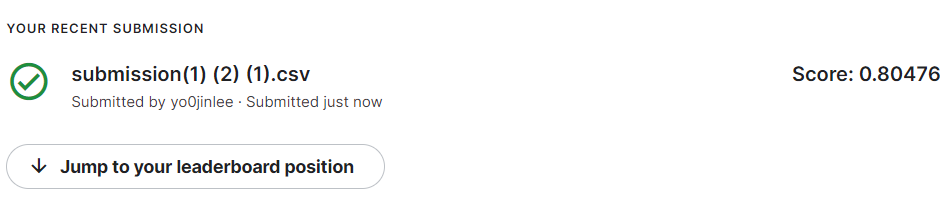



*   점수 0.80476
*   **lgbm 모델 정확도가 가장 높게 나온 이유는?** 해당 데이터의 피처들이 많고 복잡한 편인데 lgbm 은 큰 데이터를 다루는 데에 적합하기 때문이라 추측, 한편 해당 데이터에서는 피처들 간의 독립성이 보장되지 않기 때문에 Gaussian Naive Bayes 모델의 정확도가 가장 낮음






# **나였으면?**

*   이송 성공하기 위해서 
*   **55 Cancri e** 을 목적지로 하는 **B 갑판** 의 **5000** 번대 티켓을 사서 **동면**을 진행했을 것임



# **더 추가했다면 좋았을 데이터**



*   동면을 한 상태에서 이송 시작했는지, 아니면 이송 중에 동면을 한 것인지

*   만약 동면을 한 상태에서 이송을 시작했다면 Service = 1 항목 drop 시켜 정확도 높일 수 있었을 것이라 예상 (동면한 상태에서 서비스 사용하는 것은 불가능하기 때문)

*   타이타닉호의 데이터처럼 이름에서 성별 데이터를 뽑아낼 수 있었다면 좋았을 것

*   평소의 건강 상태, 목적지별 이동 시간에 관한 데이터가 있었다면 정확도를 더 높일 수 있을 것이라 생각




